#Investigation on Deep Learning Methods for Heart Image Analysis: Progress, Implications, and Prospects for the Future

In [ ]:
!pip install opencv-python-headless


#Necessary Library import

In [ ]:
# Import necessary libraries
import zipfile
import os
from PIL import Image

# Load the dataset (Assuming uploaded it directly to Colab's workspace)
zip_path = '/content/heart_dataset.zip'
unzip_dir = '/content/heart_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Recursive function to get all image files
def get_all_images(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_files.append(os.path.join(root, file))
    return image_files

image_files = get_all_images(unzip_dir)

# Print the total number of images
print(f"Total number of images: {len(image_files)}")

# Check if there are any images, and if so, display details about the first image
if image_files:
    sample_image = Image.open(image_files[0])
    print(f"Sample image format: {sample_image.format}")
    print(f"Sample image size (in pixels): {sample_image.size}")
    print(f"Sample image mode (color depth): {sample_image.mode}")
else:
    print("No image files found in the provided directory.")


Total number of images: 399
Sample image format: JPEG
Sample image size (in pixels): (640, 640)
Sample image mode (color depth): RGB


# Otsu's Thresholding


Otsu's method calculates an "optimal" threshold by maximizing the variance between two classes of pixels (background and foreground).

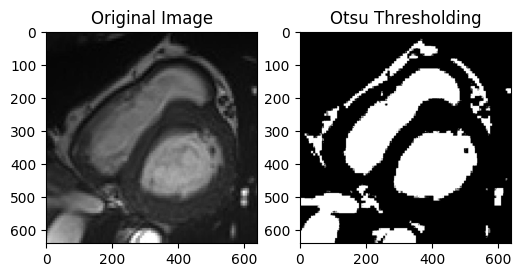

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
sample_image_path = image_files[0]  # Load the first image as a sample
img_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Otsu's thresholding
_, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(img_otsu, cmap='gray'), plt.title('Otsu Thresholding')
plt.show()


# Adaptive Thresholding

Adaptive thresholding calculates the threshold for a pixel based on a small region around it. This allows for varying thresholds over the image and can be useful for images with varying light conditions.

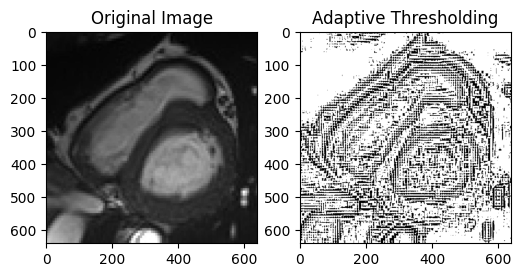

In [ ]:
# Adaptive thresholding
img_adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(img_adaptive, cmap='gray'), plt.title('Adaptive Thresholding')
plt.show()


# Region-based methods

Region Growing:

n this method, we start with a seed pixel and then consider its neighbors. If the neighbors have similar properties (like intensity), they are added to the region, and this process continues until the region stops growing.

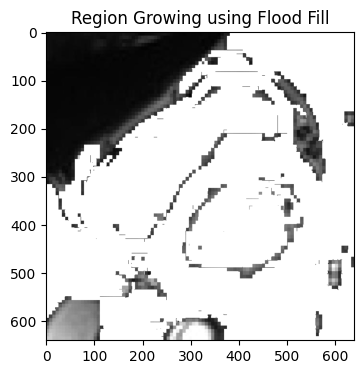

In [ ]:
import numpy as np

# Load the image in grayscale (use previous code)
img_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Seed point (can be any point within the region of interest)
seed_point = (250, 250)  # This is just an example, adjust as needed
mask = np.zeros((img_gray.shape[0] + 2, img_gray.shape[1] + 2), np.uint8)

# Flood fill parameters
lo_diff = 5
up_diff = 5

# Apply flood fill
cv2.floodFill(img_gray, mask, seed_point, 255, loDiff=lo_diff, upDiff=up_diff)

# Display
plt.figure(figsize=(6, 4))
plt.imshow(img_gray, cmap='gray')
plt.title('Region Growing using Flood Fill')
plt.show()


#Watershed Algorithm:

The watershed algorithm treats the grayscale image as a topographical map, with pixel values representing height. Basins are filled with water, and barriers are built between basins.

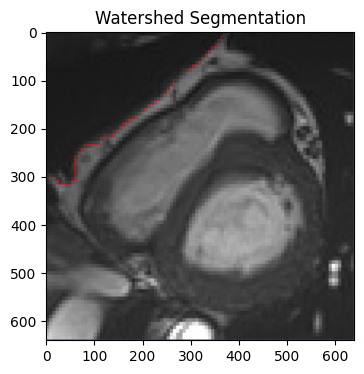

In [ ]:
# Load the image
img = cv2.imread(sample_image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Otsu's thresholding as a binary mask
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological opening
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# Finding sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
cv2.watershed(img, markers)
img[markers == -1] = [0, 0, 255]

# Display
plt.figure(figsize=(6, 4))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.show()


# Edge Detection.
Deep Learning based method

Edge detection is one of the primary methods used for image segmentation. It identifies points in a digital image at which the image brightness changes sharply or has discontinuities. Such points are typically organized into a set of curved line segments termed edges.


Sobel Operator
The Sobel operator is used in image processing and computer vision to find edges within an image. It works by calculating the gradient magnitude at each pixel, which gives the edge strength

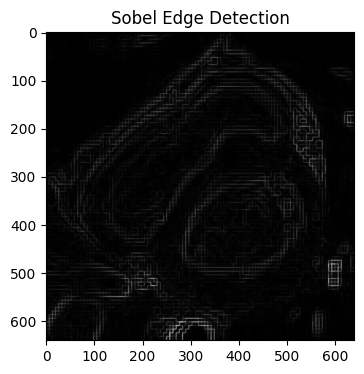

In [ ]:
# Load the image in grayscale
img_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the x and y gradients using the Sobel operator
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display
plt.figure(figsize=(6, 4))
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()


#Canny Edge Detection
The Canny edge detector is a multi-step process that involves blurring, finding intensity gradients, non-maximum suppression, and edge tracking. It's one of the most popular edge detection methods.

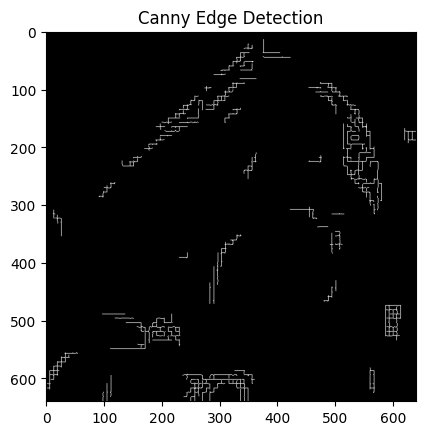

In [ ]:
# Load the image in grayscale
img_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(img_gray, 100, 200)

# Display
plt.figure(figsize=(6, 4))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


# Deep Learning-based methods:

 U-Net:
The U-Net architecture is a type of convolutional neural network that was specifically designed for biomedical image segmentation. The name "U-Net" comes from its U-shaped architecture.

1/1 [==============================] - 6s 6s/step


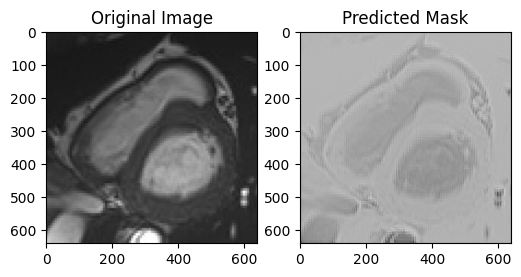

In [ ]:
import matplotlib.pyplot as plt

# Sample test
test_image = train_images[0]

predicted_mask = model.predict(tf.expand_dims(test_image, 0))

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask.squeeze(), cmap='gray')
plt.title("Predicted Mask")
plt.show()


In [ ]:
# Check if there are at least 10 images, and if so, display details about the 10th image
if len(image_files) >= 10:
    tenth_image = Image.open(image_files[9])  # Index is 9 because list indices start at 0
    print(f"10th image format: {tenth_image.format}")
    print(f"10th image size (in pixels): {tenth_image.size}")
    print(f"10th image mode (color depth): {tenth_image.mode}")
else:
    print("There are fewer than 10 images in the provided directory.")


10th image format: JPEG
10th image size (in pixels): (640, 640)
10th image mode (color depth): RGB


# Data Augmentation:
For data augmentation, we'll use the ImageDataGenerator from TensorFlow's Keras API. Here's a basic demonstration:

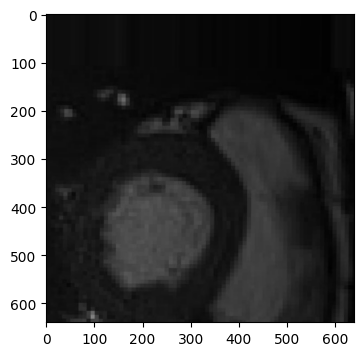

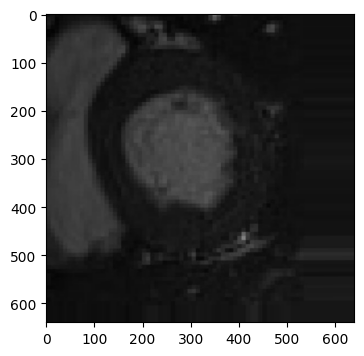

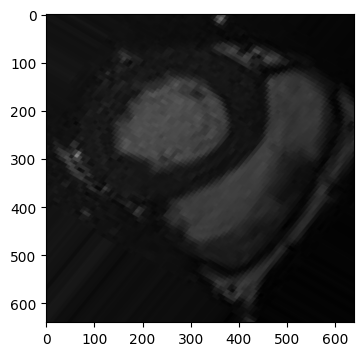

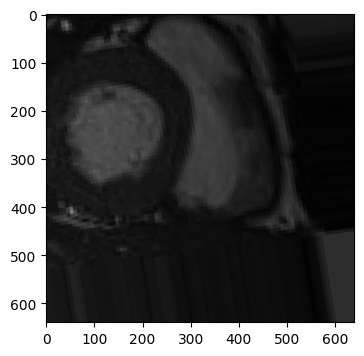

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initializing the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,      # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly translate images horizontally
    height_shift_range=0.2, # Randomly translate images vertically
    shear_range=0.2,        # Randomly apply shearing transformations
    zoom_range=0.2,         # Randomly zoom inside images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in any new pixels created during transformation
)

# Convert the 10th image to a numpy array and reshape it
tenth_image_np = np.array(tenth_image).reshape((1,) + tenth_image.size + (3,))  # Assuming the image is RGB

# Generate batches of augmented images from the original image
i = 0
for batch in datagen.flow(tenth_image_np, batch_size=1):
    plt.figure(i, figsize=(6, 4))  # Set the figure size for each image here
    imgplot = plt.imshow(Image.fromarray(batch[0].astype('uint8')))
    i += 1
    if i % 4 == 0:  # We'll display 4 augmented versions for demonstration
        break

plt.show()


This code will display the 10th image's details and then show 4 augmented versions of the 10th image. The augmentations include rotations, translations, shear, zoom, and horizontal flips. It can be adjusted the parameters as needed or add other augmentations provided by ImageDataGenerator.

In [ ]:
# Assuming by using nibabel to load NIfTI files
import nibabel as nib

def load_mri_data(filepath):
    """Load 3D MRI data from a NIfTI file."""
    img = nib.load(filepath)
    return img.get_fdata()


In [ ]:
from scipy.ndimage import rotate

def augment_3d_volume(volume, angle):
    """Rotate the 3D MRI data around one axis."""
    return rotate(volume, angle, axes=(1, 2), reshape=False)


In [ ]:
def mse_3d(volumeA, volumeB):
    """Compute the Mean Squared Error between two 3D volumes."""
    err = np.sum((volumeA - volumeB) ** 2)
    err /= float(volumeA.shape[0] * volumeA.shape[1] * volumeA.shape[2])
    return err


In [ ]:
%matplotlib inline


In [ ]:
print("Number of MRI files:", len(mri_filepaths))


Number of MRI files: 0


In [ ]:
# List contents of the directory
print(os.listdir(unzip_dir))


['heart_dataset']


In [ ]:
nested_dir = os.path.join(unzip_dir, 'heart_dataset')
mri_filepaths = get_all_images(nested_dir)
print(f"Number of MRI files: {len(mri_filepaths)}")


Number of MRI files: 399


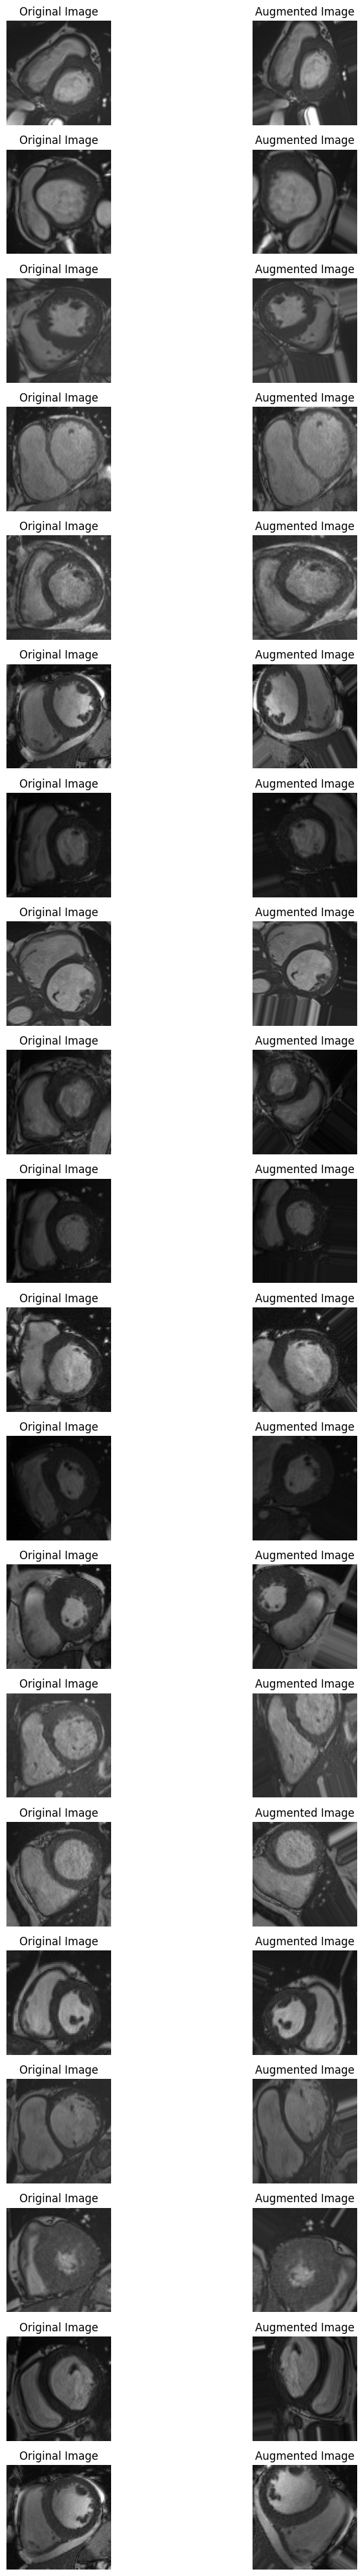

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Let's load, augment, and visualize first 20 images
fig, axes = plt.subplots(20, 2, figsize=(10, 40))  # 20 rows for images, 2 columns for original and augmented

for i, img_path in enumerate(mri_filepaths[:20]):
    # Load the image
    original_img = Image.open(img_path)
    img_np = np.array(original_img).reshape((1,) + original_img.size + (3,))  # Reshape assuming RGB

    # Augment the image
    augmented_img = next(datagen.flow(img_np, batch_size=1))[0].astype('uint8')

    # Plot original and augmented side by side
    axes[i, 0].imshow(original_img)
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(Image.fromarray(augmented_img))
    axes[i, 1].set_title('Augmented Image')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


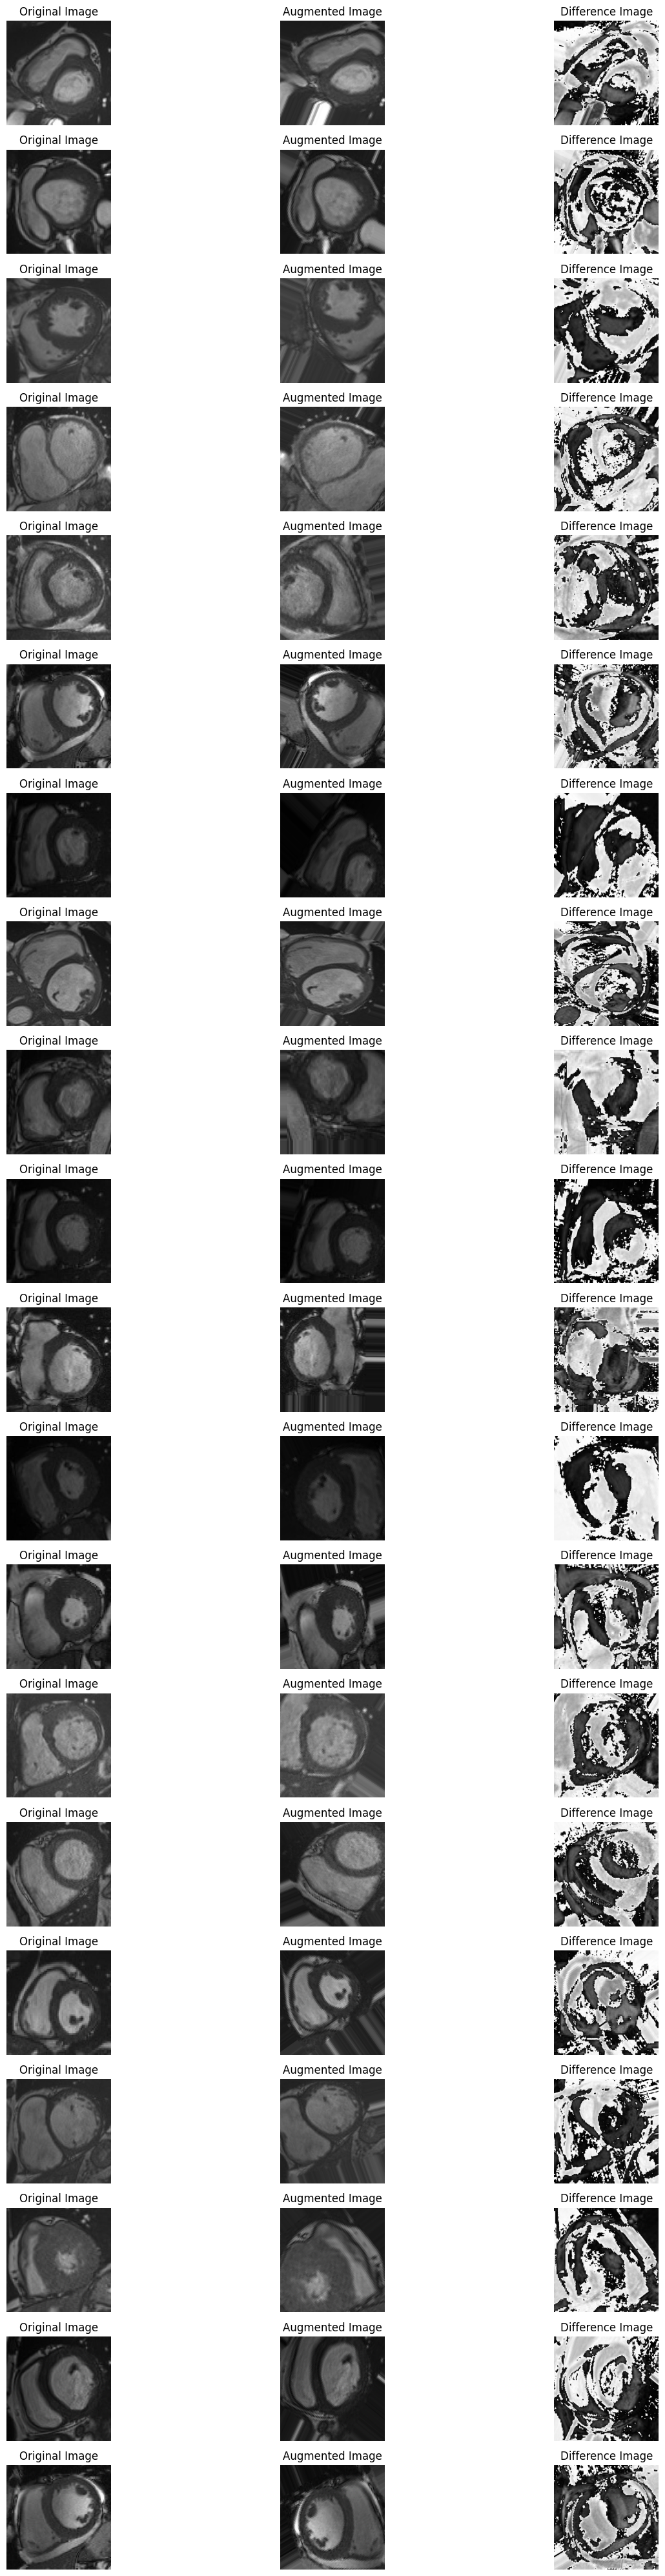

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Let's load, augment, and visualize the differences for the first 20 images
fig, axes = plt.subplots(20, 3, figsize=(15, 40))  # 20 rows for images, 3 columns for original, augmented, and difference

for i, img_path in enumerate(mri_filepaths[:20]):
    # Load the image
    original_img = Image.open(img_path)
    img_np = np.array(original_img).reshape((1,) + original_img.size + (3,))  # Reshape assuming RGB

    # Augment the image
    augmented_img_np = next(datagen.flow(img_np, batch_size=1))[0].astype('uint8')

    # Compute pixel difference
    difference = np.abs(img_np - augmented_img_np)

    # Plot original, augmented, and difference side by side
    axes[i, 0].imshow(original_img)
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(Image.fromarray(augmented_img_np))
    axes[i, 1].set_title('Augmented Image')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(Image.fromarray(difference[0].astype('uint8')))
    axes[i, 2].set_title('Difference Image')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
